In [ ]:
# 🧩 Step 1: Install required packages
!pip install -q tensorflow opencv-python matplotlib

# 🧩 Step 2: Upload your model and image
from google.colab import files
uploaded = files.upload()  # Upload full_model.h5 and an image file like example.jpg

# 🧩 Step 3: Load your trained model
import tensorflow as tf

model = tf.keras.models.load_model("full_model.h5")

# Optional: View layer names to choose correct last conv layer
for i, layer in enumerate(model.layers):
    print(f"{i}: {layer.name} ({layer.__class__.__name__})")

# Replace this with the correct layer name after inspection
last_conv_layer_name = "conv2d"  # Change this if needed

# 🧩 Step 4: Define preprocessing and Grad-CAM functions
import numpy as np
import matplotlib.pyplot as plt
import cv2

def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array = array / 255.0
    return array

def make_gradcam_heatmap(img_array, model, pred_index=None):
    last_conv_layer = model.layers[11]  # Conv2D with 256 filters
    grad_model = tf.keras.models.Model(
        [model.input], [last_conv_layer.output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    superimposed_img = heatmap_color * alpha + img
    plt.imshow(cv2.cvtColor(superimposed_img.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Grad-CAM")
    plt.show()

# 🧩 Step 5: Run Grad-CAM on an uploaded image
img_path = "1-3.png"  # Replace with your uploaded image file name
img_size = (200, 200)     # Change based on your model's input size

img_array = get_img_array(img_path, size=img_size)
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
display_gradcam(img_path, heatmap)


Saving full_model.h5 to full_model (1).h5
Saving 1-3.png to 1-3.png
0: conv2d (Conv2D)
1: max_pooling2d (MaxPooling2D)
2: conv2d_1 (Conv2D)
3: max_pooling2d_1 (MaxPooling2D)
4: conv2d_2 (Conv2D)
5: max_pooling2d_2 (MaxPooling2D)
6: conv2d_3 (Conv2D)
7: max_pooling2d_3 (MaxPooling2D)
8: conv2d_4 (Conv2D)
9: max_pooling2d_4 (MaxPooling2D)
10: conv2d_5 (Conv2D)
11: max_pooling2d_5 (MaxPooling2D)
12: flatten (Flatten)
13: dense (Dense)
14: dense_1 (Dense)
15: dense_2 (Dense)


AttributeError: The layer sequential has never been called and thus has no defined output.

In [ ]:
# ✅ Step 4: Define Grad-CAM and visualization functions
import numpy as np
import matplotlib.pyplot as plt
import cv2

def get_img_array(img_path, size=(200, 200)):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array = array / 255.0
    return array

def make_gradcam_heatmap(img_array, model, pred_index=None):
    last_conv_layer = model.layers[11]  # 256-filter Conv2D layer
    grad_model = tf.keras.models.Model(
        [model.input], [last_conv_layer.output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    superimposed_img = heatmap_color * alpha + img
    plt.imshow(cv2.cvtColor(superimposed_img.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Grad-CAM")
    plt.show()


# ✅ Run Grad-CAM
img_path = "1-3.png"  # Change to your uploaded image filename if different
img_array = get_img_array(img_path)
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)

AttributeError: The layer sequential has never been called and thus has no defined input.

In [ ]:
# ✅ Step 3: Rebuild the model architecture and load weights
import tensorflow as tf

inputs = tf.keras.Input(shape=(200, 200, 3))

x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2, 2)(x)
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Conv2D(256, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Load weights
model.load_weights("full_model.h5")


In [ ]:
# ✅ Step 4: Define Grad-CAM and visualization functions
import numpy as np
import matplotlib.pyplot as plt
import cv2

def get_img_array(img_path, size=(200, 200)):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array / 255.0

def make_gradcam_heatmap(img_array, model, pred_index=None):
    last_conv_layer = model.get_layer(index=11)  # Conv2D(256 filters)
    grad_model = tf.keras.models.Model(
        [model.input], [last_conv_layer.output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    superimposed_img = heatmap_color * alpha + img
    plt.imshow(cv2.cvtColor(superimposed_img.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Grad-CAM")
    plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1259']
Received: inputs=Tensor(shape=(1, 200, 200, 3))
  warnings.warn(msg)


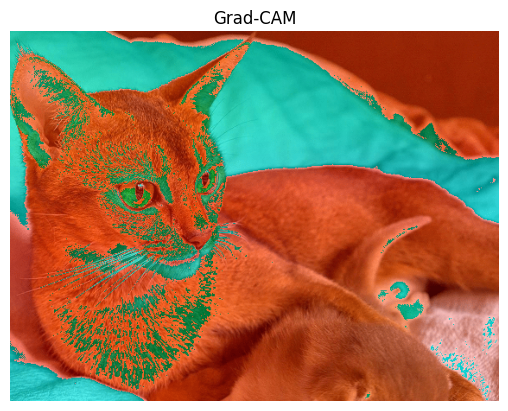

In [ ]:
# ✅ Step 5: Run Grad-CAM
img_path = "1-3.png"
img_array = get_img_array(img_path)
heatmap = make_gradcam_heatmap(img_array, model)
display_gradcam(img_path, heatmap)


Saving 1-3.png to 1-3 (2).png


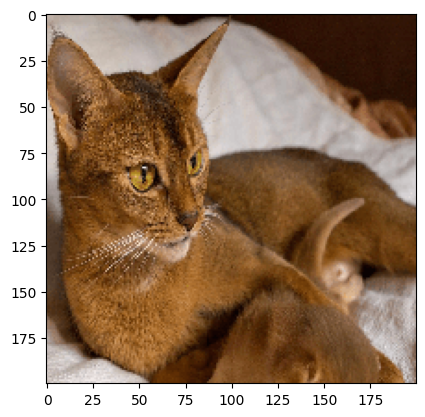

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1-3 (2).png
[[1. 0. 0. 0.]]
It is an Abyssian Cat


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)


  plt.imshow(img)

  plt.show()

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

  for i in classes:
    if classes[0][0]==1:
      print('It is an Abyssian Cat')
    elif classes[0][1]==1:
      print('It is a Munchkin Cat')
    elif classes[0][2]==1:
      print('It is a Persian Cat')
    elif classes[0][3]==1:
      print('It is a Toyger Cat')